In [149]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/abroad-study-cost-predictor/abroad  - Sheet1.csv


In [150]:
df = pd.read_csv('/kaggle/input/abroad-study-cost-predictor/abroad  - Sheet1.csv')

In [151]:
df.head()

,COUNTRY,COURSE TYPE,COURSE (SPECIALIZATION),FEES
0,GERMANY,MBA,MBA in Sales & Marketing,3678127.31
1,GERMANY,MBA,MBA in Banking,1253594.37
2,GERMANY,MBA,MBA in Business Administration,454540.69
3,GERMANY,MBA,MBA in Hospital/Healthcare Management,3246719.22
4,GERMANY,MBA,MBA in Human Resource Management,1217519.71


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   COUNTRY                  489 non-null    object
 1   COURSE TYPE              489 non-null    object
 2   COURSE (SPECIALIZATION)  489 non-null    object
 3   FEES                     489 non-null    object
dtypes: object(4)
memory usage: 15.4+ KB


In [153]:
df.shape

(489, 4)

In [154]:
df.isnull().sum()

COUNTRY                    0
COURSE TYPE                0
COURSE (SPECIALIZATION)    0
FEES                       0
dtype: int64

In [155]:
df['FEES'] = df['FEES'].str.replace(',', '').astype(float)
df.head()

,COUNTRY,COURSE TYPE,COURSE (SPECIALIZATION),FEES
0,GERMANY,MBA,MBA in Sales & Marketing,3678127.31
1,GERMANY,MBA,MBA in Banking,1253594.37
2,GERMANY,MBA,MBA in Business Administration,454540.69
3,GERMANY,MBA,MBA in Hospital/Healthcare Management,3246719.22
4,GERMANY,MBA,MBA in Human Resource Management,1217519.71


In [156]:
df.columns

Index(['COUNTRY', 'COURSE TYPE', 'COURSE (SPECIALIZATION)', 'FEES'], dtype='object')

# EDA

Top 10 countries with Highest overall Avg fees

In [157]:
df1 = df.groupby('COUNTRY')['FEES'].mean().sort_values(ascending = False)

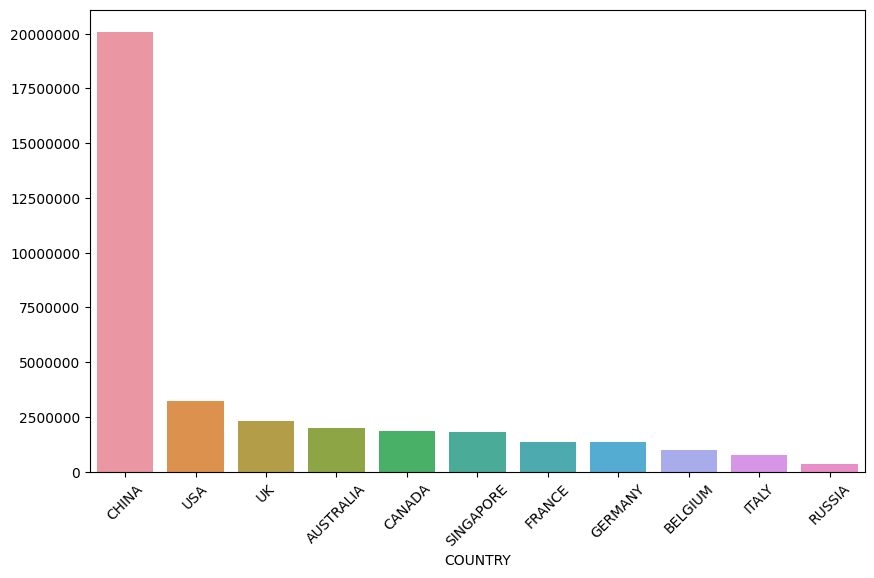

In [158]:
plt.figure(figsize= (10,6))
sns.barplot(x = df1.index , y = df1.values)
plt.xticks(rotation = 45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Text(0, 0.5, '')

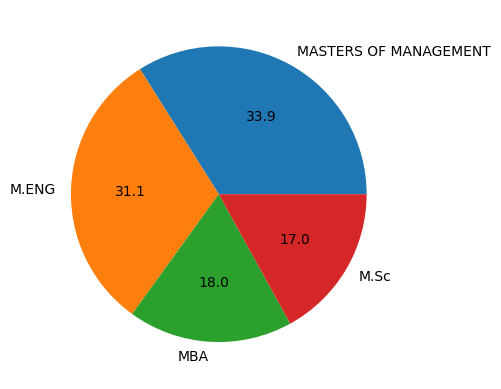

In [159]:
df['COURSE TYPE'].value_counts().plot(kind = 'pie',autopct = '%.1f')
plt.ylabel(None)

<Axes: >

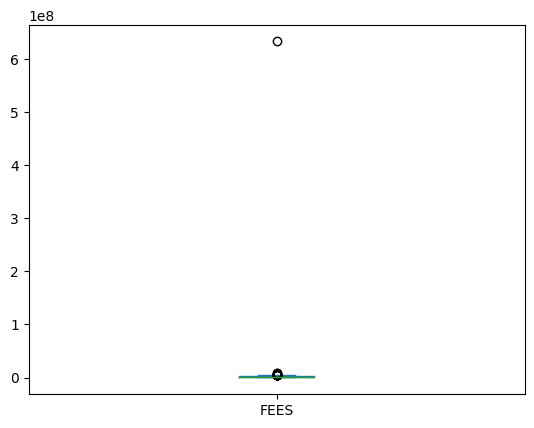

In [160]:
df['FEES'].plot(kind = 'box')

In [161]:
# removing extreme outlier
df_filtered = df[df['FEES'] < 200000000]

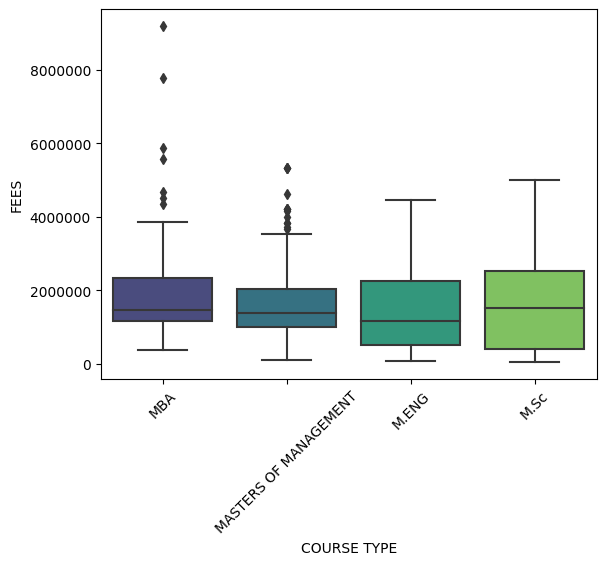

In [162]:
sns.boxplot(x = 'COURSE TYPE', y = 'FEES', data = df_filtered, palette = 'viridis' )
plt.xticks(rotation = 45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [163]:
df_sp = df['COURSE (SPECIALIZATION)'].value_counts().head(10)

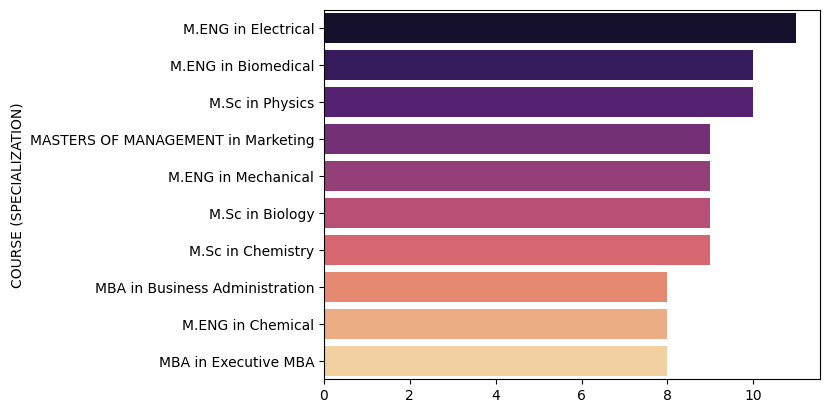

In [164]:
sns.barplot(x = df_sp.values, y = df_sp.index, palette = 'magma')
plt.show()

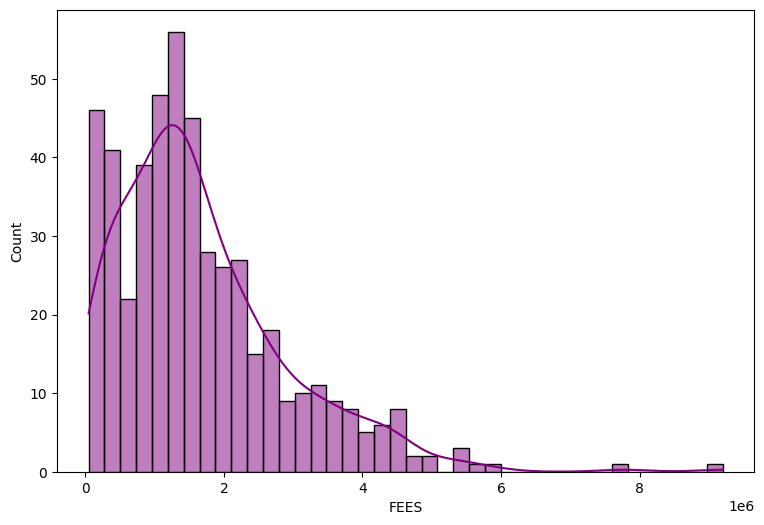

In [165]:
plt.figure(figsize=(9,6))
sns.histplot(x = 'FEES', data =df_filtered, kde = True, color = 'purple', bins = 40)
plt.show()

In [166]:
df.COUNTRY.value_counts()

COUNTRY
GERMANY      61
FRANCE       60
CANADA       59
USA          55
UK           50
ITALY        45
AUSTRALIA    42
CHINA        33
SINGAPORE    32
BELGIUM      29
RUSSIA       23
Name: count, dtype: int64

# Regression Model

In [167]:
x = df_filtered['COURSE TYPE']
y = df_filtered['FEES']


In [168]:
x = pd.get_dummies(x, columns=['course_type'], drop_first=True,dtype = int)

In [169]:
x.head()

,M.Sc,MASTERS OF MANAGEMENT,MBA
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [170]:
from sklearn.model_selection import train_test_split

In [171]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [172]:
from sklearn.linear_model import LinearRegression

In [173]:
lr = LinearRegression()

In [174]:
lr.fit(x_train,y_train)

LinearRegression()

In [175]:
y_pred = lr.predict(x_test)

In [176]:
y_pred[:3]

array([1517692.43922481, 1517692.43922481, 1443370.05737705])

In [177]:
y_test[:3]

72     5325155.20
245    4202265.69
438     234878.29
Name: FEES, dtype: float64

In [178]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [179]:
r2_score(y_test,y_pred)

-0.031055678814561727

A negative R² score generally indicates that our model is performing worse than a simple baseline model (mean of the target variable). 